## The Sparks Foundation - Prediction using Supervised ML 

Objective - To Predict the percentage of an student based on the no. of study hours.
##### Author - Priyanka Sukale

### Importing required Libraries and reading the data

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)


### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


Dataset contains two columns, containing no null values.

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


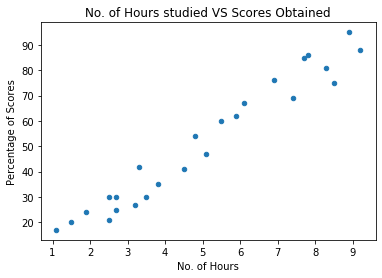

In [7]:
# 2_D Scatter Plot

data.plot(kind='scatter', x='Hours', y='Scores', title = 'No. of Hours studied VS Scores Obtained')
plt.xlabel('No. of Hours')
plt.ylabel('Percentage of Scores')
plt.show()

**There is a positive linear relationship between No. of Hours studied and the Scores obtained. Hence we proceed to fit Linear Regression model for further analysis.**

# **Preparing the data**

Divide the data into input and output

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

### Splitting the data into Train (80%) and Test (20%)

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
Lr = LinearRegression()  
Lr.fit(X_train, Y_train) 
print("Training Complete")

Training Complete


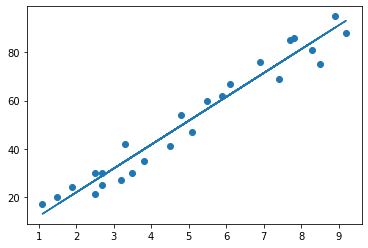

Equation of line: Y =  9.91065648064224 X + 2.018160041434662


In [11]:
line = Lr.coef_*x+Lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()
print(('Equation of line: Y = ') ,str(Lr.coef_[0]),('X +'),str(Lr.intercept_))

### Testing the Model

In [12]:
print('Training Score: ', round(Lr.score(X_train,Y_train)*100,2),'%')
print('Testing Score: ', round(Lr.score(X_test,Y_test)*100,2),'%')

Training Score:  95.16 %
Testing Score:  94.55 %


In [17]:
# Comparing Actual vs Predicted
Y_pred = Lr.predict(X_test)

df=pd.DataFrame({'actual':Y_test,'predicted':Y_pred})
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation

In [19]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn import metrics  

k = X_test.shape[1]
n = len(X_test)
r2 = r2_score(Y_test, Y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

R2 = 0.9454906892105354 
Adjusted R2 = 0.9273209189473804
Mean Absolute Error: 4.183859899002982


### Data Prediction

In [21]:
Hours = 9.25
pred = Lr.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737539
